# Deep Learning with Python - Chapter 2
## 2.2 - Data Representations for Neural Networks

In [1]:
import numpy as np

In [11]:
# 0D Tensors - A single scalar or number
x = np.array(12)
x
print("Rank of the scalar x: ", x.ndim)

# 1D Tensors - Vectors, have one axis, but arbitrarily many dimensions along that axis
y = np.array([12, 3, 6, 14])
y
print('Rank of the vector y: ', y.ndim)

# 2D Tensors - Matrices 
z = np.array([[5, 78, 2, 34, 0], 
             [5, 78, 2, 34, 0],
             [5, 78, 2, 34, 0]])
print('Rank of the matrix z: ', z.ndim)

# 3D Tensors - interpreted as a cube of numbers
tensor_3d = np.array([[[5, 78, 2, 34, 0], 
             [5, 78, 2, 34, 0],
             [5, 78, 2, 34, 0]], 
            [[5, 78, 2, 34, 0], 
             [5, 78, 2, 34, 0],
             [5, 78, 2, 34, 0]], 
            [[5, 78, 2, 34, 0], 
             [5, 78, 2, 34, 0],
             [5, 78, 2, 34, 0]]])
print('Rank of array of matrices: ', tensor_3d.ndim)

Rank of the scalar x:  0
Rank of the vector y:  1
Rank of the matrix z:  2
Rank of array of matrices:  3


## Examining Dimensions/Shapes/Data Type in MNIST

In [12]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
print("The rank of the training images tensor: :", train_images.ndim)
print("The rank of the test images tensor: ", test_images.ndim)
print("The rank of the train labels tensor: ", train_labels.ndim)
print("The rank of the test labels tensor: ", test_labels.ndim)

The rank of the training images tensor: : 3
The rank of the test images tensor:  3
The rank of the train labels tensor:  1
The rank of the test labels tensor:  1


In [21]:
# For training and test data/labels, printing dimension/rank, shape, and data type of a sample element
myDataCollection = {
    'train_images': train_images,
    'train_labels': train_labels,
    'test_images': test_images,
    'test_labels': test_labels
}

for (key, value) in myDataCollection.items():
    print("Rank of " + key + ' = ' + str(value.ndim))
    print("Shape of " + key + ' = ' + str(value.shape))
    print("Dtype of " + key + ' = ' + str(value[0].dtype)) 

Rank of train_images = 3
Shape of train_images = (60000, 28, 28)
Dtype of train_images = uint8
Rank of train_labels = 1
Shape of train_labels = (60000,)
Dtype of train_labels = uint8
Rank of test_images = 3
Shape of test_images = (10000, 28, 28)
Dtype of test_images = uint8
Rank of test_labels = 1
Shape of test_labels = (10000,)
Dtype of test_labels = uint8


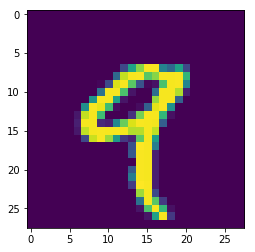

In [23]:
# Using matplotlib to display a single image
digit = train_images[4]

# Making necessary imports
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.viridis)
plt.show()

# Jupyter Notebook-specific command to display images without explicitly rendering their axes
%matplotlib inline

## Tensor Manipulation

In [25]:
# Selecting digits 10 to 99 from the train_labels array - tensor slicing
my_slice = train_images[10:100]
print(my_slice.shape)   # 90 matrices of 28 x 28 unsigned 8 bit integers

(90, 28, 28)


In [27]:
# Equivalent to a more detailed notation which is 
my_new_slice = train_images[10:100, :, :] # : means select all elements along this axis
print(my_new_slice.shape) # Same results

(90, 28, 28)


In [28]:
# Equivalent to an even more detailed notation where we explicitly specify start and endpoints
my_newer_slice = train_images[10:100, 0:28, 0:28]
print(my_newer_slice.shape)

(90, 28, 28)


In [35]:
# Element-wise relu
def naive_relu(x):
    assert len(x.shape) == 2   # x is a 2D numpy tensor
    
    # Making a copy of the argument before modification
    x = x.copy()
    
    # For every row in the tensor
    for i in range(x.shape[0]):  
        # For every column in that row
        for j in range(x.shape[1]):
            # The new value of x is the maximum value of current element and 0
            x[i, j] = max(x[i, j], 0)
    return x

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [-1, -2, 3]])
print(naive_relu(my_matrix))

[[1 2 3]
 [4 5 6]
 [0 0 3]]


In [36]:
# Naive implementation of element-wise addition
def naive_add(x, y):
    assert len(x.shape) == 2   # x is a 2D numpy tensor
    assert len(y.shape) == 2   # y is also a 2D numpy tensor
    
    # Make a copy of the x matrix - will be modified - don't want to mutate args
    x = x.copy()
    # For every row in the matrix
    for i in range(x.shape[0]):
        # For every column in that row
        for j in range(x.shape[1]):
            # Add the corresponding element of y
            x[i, j] += y[i, j]
    return x

print(naive_add(my_matrix, my_matrix))

[[ 2  4  6]
 [ 8 10 12]
 [-2 -4  6]]


In [38]:
# Can also do this with built-in numpy methods
import numpy as np
z = my_matrix + my_matrix # element-wise addition
z = np.maximum(z, 0)      # relu
print(z)

[[ 2  4  6]
 [ 8 10 12]
 [ 0  0  6]]


In [46]:
# Broadcasting - add a matrix and a vector
def naive_add_matrix_vector(x, y):
    assert len(x.shape) == 2         # x is a 2D numpy tensor - matrix
    assert len(y.shape) == 1         # y is a 1D numpy tensor - vector
    assert x.shape[1] == y.shape[0]  # columns of matrix = columns of vector 
    
    x = x.copy()
    for i in range(x.shape[0]):      # for every row in the matrix
        for j in range(x.shape[1]):  # and for each element of the vector
            x[i, j] += y[j]          # add the elements of the vector to the corresponding elements of that row
    return x

vector_a = np.array([64, 3, 32])
vector_b = np.array([32, 10])

print(naive_add_matrix_vector(my_matrix, vector_a))

[[65  5 35]
 [68  8 38]
 [63  1 35]]


In [52]:
# Using built-in broadcasting to find maximum value in two tensors of different sizes
import numpy as np

first_vector = np.random.random((64, 3, 32, 10))
second_vector = np.random.random((32, 10))

print(first_vector.shape)
print(second_vector.shape)
element_wise_max = np.maximum(first_vector, second_vector)
print(element_wise_max.shape)

(64, 3, 32, 10)
(32, 10)
(64, 3, 32, 10)


In [60]:
# Tensor dot operation - two vectors
def naive_vector_dot(x, y):
    assert len(x.shape) == 1         # x is a numpy vector
    assert len(y.shape) == 1         # y is a numpy vector
    assert x.shape[0] == y.shape[0]  # same number of elements
    z = 0                            # sum s a scalar - element-wise sum
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

first_vector = np.random.rand(10, )
second_vector = np.random.rand(10, )
print(naive_vector_dot(first_vector, second_vector)) # scalar

1.653572663997927


In [65]:
# Tensor dot operation - matrix and vector
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2    # x is a numpy matrix
    assert len(y.shape) == 1    # y is a numpy vector
    assert x.shape[1] == y.shape[0]   # compatible dimensions
    
    # Number of elements in each vector (row) of the matrix is the same 
    # as the number of elements in the vector
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            z[i] += x[i, j] * y[j]
    return z

print(naive_matrix_vector_dot(my_matrix, vector_a))

[166. 463.  26.]


In [64]:
# Can also use vector dot operation function in this implementation
def improved_naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y) 
    return z

print(improved_naive_matrix_vector_dot(my_matrix, vector_a))

[166. 463.  26.]


In [66]:
# Got the same result as the implementation that uses two for loops

In [68]:
# Arbitrary vector product - between two matrices
def naive_matrix_dot(x, y):
    # First make sure both x and y are matrices - 2D Numpy tensors
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    
    # Also check that the number of cols in x = number of rows in y
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1])) # argument must be a tuple
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            
            # A single scalar that is formed by the current row and current column
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

print(naive_matrix_dot(my_matrix, my_matrix))

[[  6.   6.  24.]
 [ 18.  21.  60.]
 [-12. -18.  -6.]]


In [69]:
my_matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [-1, -2,  3]])

In [70]:
# Tensor Reshaping
x = np.array([[0, 1], [2, 3], [4, 5]])
print(x.shape)

(3, 2)


In [71]:
x.reshape(6, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [72]:
x.reshape(1, 6)

array([[0, 1, 2, 3, 4, 5]])

In [76]:
x.reshape(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [81]:
# Transposition
x = np.zeros((300, 20))
x_transpose = np.zeros((20, 300))
print(x.shape)
print(x.transpose().shape)

(300, 20)
(20, 300)
